## **Decision Trees**

<img src="https://miro.medium.com/max/1630/1*XZ220vTa7rN8ccJZZNe09w.png">

## Understanding Decision Trees

Decision trees are a powerful and intuitive machine learning algorithm. They make predictions by following a series of decision rules, much like a flowchart. Let's break down how they work:

### 1. Tree Structure
- **Root Node**: The topmost node, representing the entire dataset.
- **Decision Nodes**: Internal nodes where the data is split based on a feature.
- **Leaf Nodes**: The final nodes that provide predictions.

### 2. How Decisions Are Made
At each decision node, the tree asks a question about a feature (in our case, 'Level') and splits the data accordingly. This process continues until we reach a leaf node.

### 3. Making Predictions
To make a prediction, we start at the root and follow the appropriate path down the tree based on the feature values until we reach a leaf node. The value at the leaf node is our prediction.

Let's examine our tree more closely:

## **Get Started with Decision Tree**

In [2]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

## **Importing the Dataset**

Reading ().csv file

In [3]:
dataset = pd.read_csv("./Position_Salaries.csv")
dataset.head()



,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

X= np.array(X).reshape(-1,1)
y= np.array(y).reshape(-1,1)

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## **Splitting the Dataset into the Training Set and Test Set**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

## **Training the Model**

In [9]:

# Create and train the decision tree
modelDT = DecisionTreeRegressor( random_state=0,max_depth=4)
modelDT.fit(X,y)

DecisionTreeRegressor(max_depth=4, random_state=0)

## **Tree Visualization**

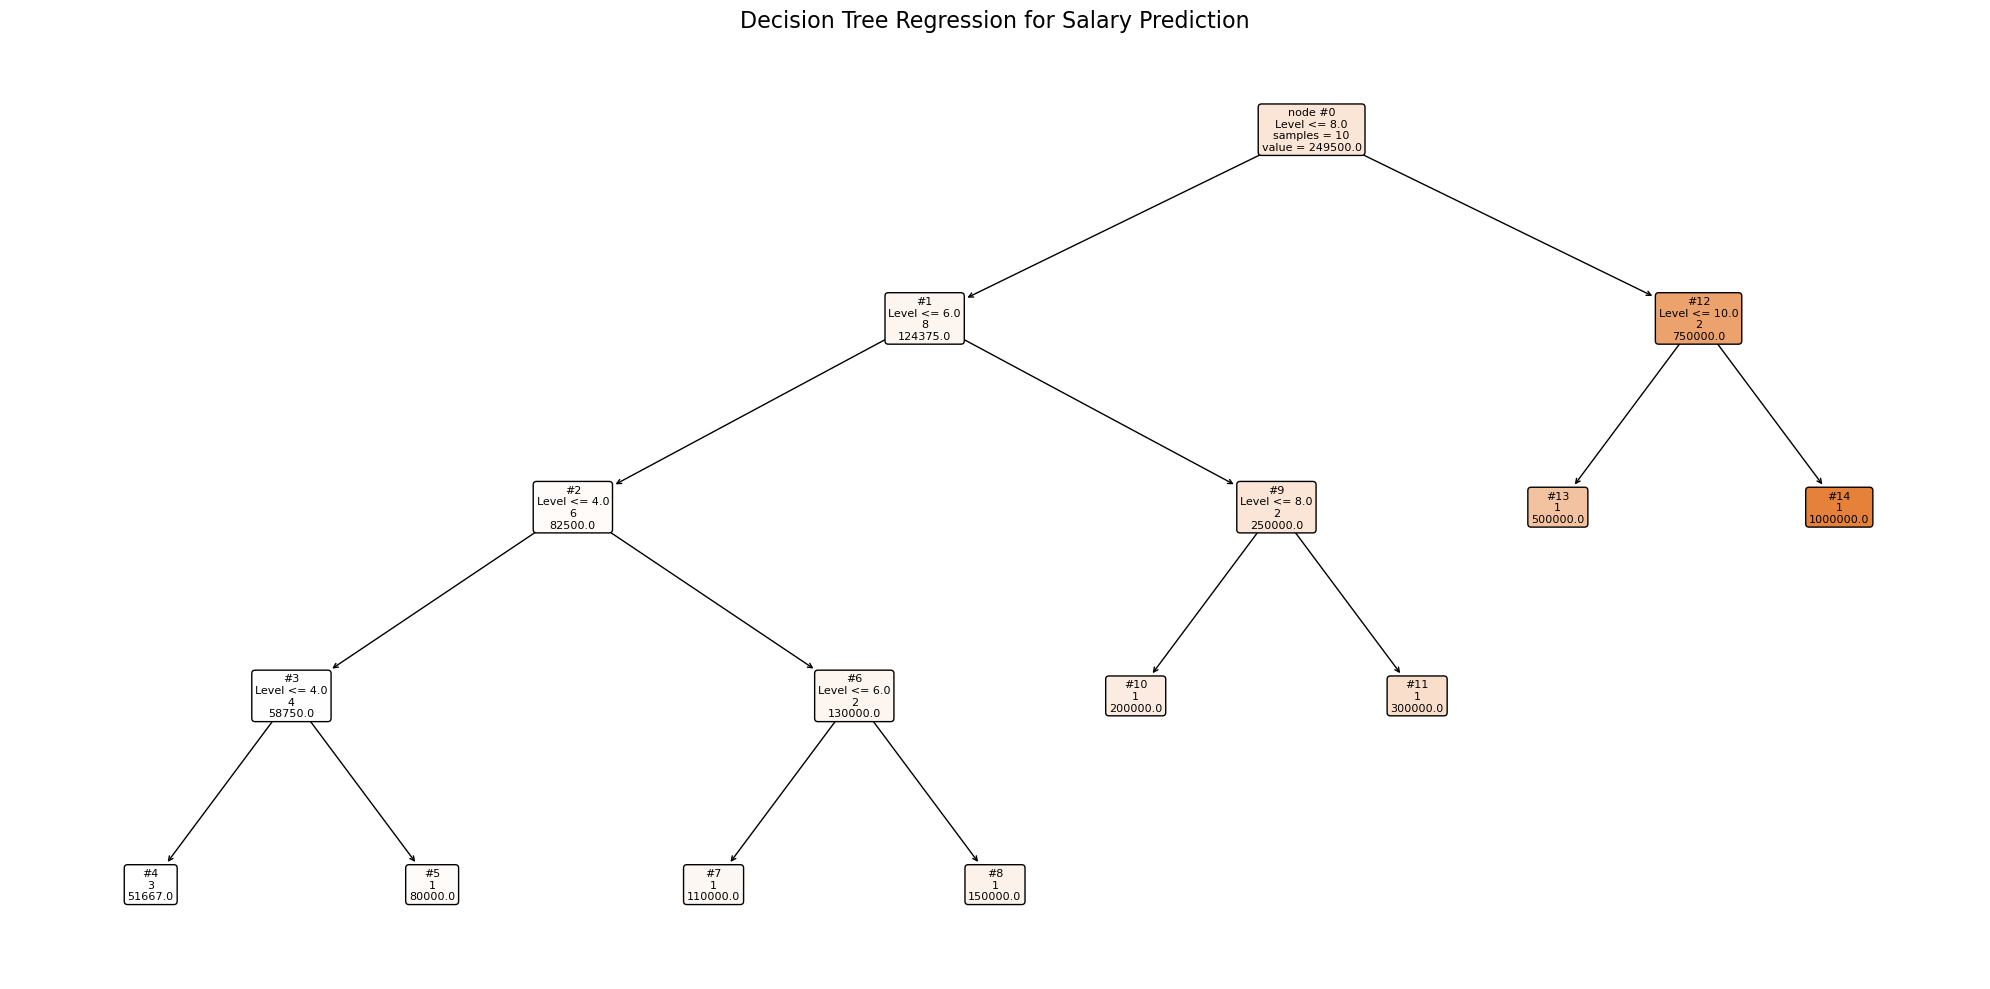

In [10]:
## **Tree Visualization**
from sklearn import tree
import matplotlib.pyplot as plt

# Create a figure with a larger size
plt.figure(figsize=(20, 10))

# Plot the tree with more detailed parameters
tree.plot_tree(modelDT, 
               feature_names=['Level'],
               class_names=['Salary'],
               filled=True, 
               rounded=True, 
               fontsize=8,
               precision=0,
               impurity=False,
               node_ids=True,
               proportion=False,
               label='root')

# Add a title to the plot
plt.title("Decision Tree Regression for Salary Prediction", fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## **Prediction**

In [16]:
y_pred = modelDT.predict([[13]])
y_pred

array([1000000.])

## **Mean Squared Error**

In [17]:
regression_model_mse = mean_squared_error(y_test,modelDT.predict(X_test))
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",modelDT.score(X,y))

Mean Squared Error:	 317074.2990390598
R squared value		 0.9998553639817056


## **Visualization**

For level 6.5, the predicted salary is: $150000.00


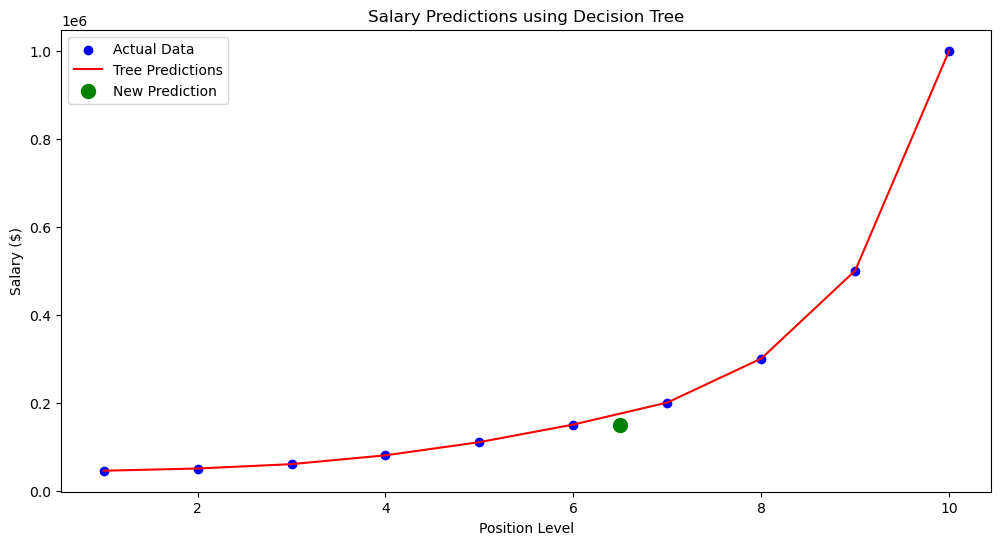

In [53]:

# Let's make a prediction for a new level
new_level = np.array([[6.5]])
prediction = modelDT.predict(new_level)

print(f"For level 6.5, the predicted salary is: ${prediction[0]:.2f}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, modelDT.predict(X), color='red', label='Tree Predictions')
plt.scatter(new_level, prediction, color='green', s=100, label='New Prediction')
plt.xlabel('Position Level')
plt.ylabel('Salary ($)')
plt.title('Salary Predictions using Decision Tree')
plt.legend()
plt.show()

